# Ford GoBike System Data Exploration
## by Mohamed Elhussien Eldessouky

## Preliminary Wrangling

> This document explores a dataset containing information about 1,154,202 individual rides made in a bike-sharing system representing three major cities in USA (San Francisco, Boston and New York) during February 2019.

**Data wrangling steps are summarized as following:**
<br>1- Merging the three data frames after dropping unnecessary columns and adding cities columns.
<br>2- Limiting gender column to males and females only.
<br>3- Removing null value rows.
<br>4- Renaming columns for easier interpretation.
<br>5- Calculating distance from longitudes and latitudes based on Haversine formula.
<br>6- Converting stations id and birth year columns from float into integers.
<br>7- Adding age column based on birth year column
<br>8- Converting date-time columns from string into date-time format.
<br>9- Extracting hours from date-time column.
<br>10-Adding day of week column to determine whether the day is weekday or weekend.
<br>11-Adding a new column for the duration in minutes.
<br>12-Adding a new column to categorize trips into three categories bases on duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Importing San-Francisco dataset
df_sf = pd.read_csv('201902-fordgobike-tripdata-San Francisco.csv')
df_sf['city'] = "San Francisco"
df_sf.drop(columns='bike_share_for_all_trip', inplace=True)
df_sf.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,city
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,San Francisco


In [3]:
#Importing Boston dataset
df_bo = pd.read_csv('201902-bluebikes-tripdata-Boston.csv')
df_bo['city'] = "Boston"
df_bo.columns = df_sf.columns
df_bo.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,city
0,331,2019-02-01 00:03:56.3250,2019-02-01 00:09:28.1720,108,Harvard University / SEAS Cruft-Pierce Halls a...,42.377945,-71.116865,377,Perry Park,42.379273,-71.103419,3817,Subscriber,1988,1,Boston


In [4]:
#Importing New-York dataset
df_ny = pd.read_csv('201902-citibike-tripdata-New York.csv')
df_ny['city'] = "New York"
df_ny.columns = df_sf.columns
df_ny.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,city
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,3494.0,E 115 St & Lexington Ave,40.797911,-73.9423,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1,New York


In [5]:
#Concatenating the three data frames 
df = pd.concat([df_sf, df_bo, df_ny], ignore_index=True)
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,city
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,San Francisco
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,San Francisco
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,San Francisco


In [6]:
#Replacing 1 and 2 values to males and females
df['member_gender'].replace({1: "Male", 2: "Female"}, inplace=True)
print(df['member_gender'].unique())

['Male' nan 'Other' 'Female' 0]


In [7]:
#Limiting gender values to males and females only
df = df.query('member_gender == "Male" | member_gender == "Female"')

In [8]:
print(df.shape)
print(df.info())

(1154401, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154401 entries, 0 to 1207621
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1154401 non-null  int64  
 1   start_time               1154401 non-null  object 
 2   end_time                 1154401 non-null  object 
 3   start_station_id         1154202 non-null  float64
 4   start_station_name       1154202 non-null  object 
 5   start_station_latitude   1154401 non-null  float64
 6   start_station_longitude  1154401 non-null  float64
 7   end_station_id           1154202 non-null  float64
 8   end_station_name         1154202 non-null  object 
 9   end_station_latitude     1154401 non-null  float64
 10  end_station_longitude    1154401 non-null  float64
 11  bike_id                  1154401 non-null  int64  
 12  user_type                1154401 non-null  object 
 13  member_birth_year        115

In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154202 entries, 0 to 1207621
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1154202 non-null  int64  
 1   start_time               1154202 non-null  object 
 2   end_time                 1154202 non-null  object 
 3   start_station_id         1154202 non-null  float64
 4   start_station_name       1154202 non-null  object 
 5   start_station_latitude   1154202 non-null  float64
 6   start_station_longitude  1154202 non-null  float64
 7   end_station_id           1154202 non-null  float64
 8   end_station_name         1154202 non-null  object 
 9   end_station_latitude     1154202 non-null  float64
 10  end_station_longitude    1154202 non-null  float64
 11  bike_id                  1154202 non-null  int64  
 12  user_type                1154202 non-null  object 
 13  member_birth_year        1154202 non-null 

In [11]:
#Rename birth year and gender columns
df.rename(columns={'member_birth_year': 'birth_year', 'member_gender': 'gender'}, inplace=True)

In [12]:
#Calculating distance between two points using Haversine formula
from math import sin, cos, sqrt, atan2, radians
# approximate radius of earth in km

def distance(lat1, lat2, lon1, lon2):
    R = 6373.0
    lat1r = radians(lat1)
    lon1r = radians(lon1)
    lat2r = radians(lat2)
    lon2r = radians(lon2)
    dlon = lon2r - lon1r
    dlat = lat2r - lat1r
    a = sin(dlat / 2)**2 + cos(lat1r) * cos(lat2r) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [13]:
#adding distance (km) column to dataframe
df['distance'] = df.apply(lambda x: distance(x['start_station_latitude'], x['end_station_latitude'], x['start_station_longitude'], x['end_station_longitude']), axis=1)

In [14]:
#converting three columns into integers
df[['start_station_id', 'end_station_id', 'birth_year']] = df[['start_station_id', 'end_station_id', 'birth_year']].astype('int64')

In [15]:
#Adding age column based on birth year column
df['age'] = 2019 - df['birth_year']

In [16]:
#Converting date-time columns from string to date-time format
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].astype('datetime64[s]')

In [17]:
#Extracting hours from start date column
df['hour'] = df['start_time'].dt.hour

In [18]:
#Adding day of week column to determine whether the day is weekday or weekend
df['day_type'] = np.where((df['start_time'].dt.dayofweek) < 5,"weekday","weekend")

In [19]:
#Adding a new column for duration in minutes
df['duration_min'] = df['duration_sec'] / 60

In [20]:
#Adding trip type column based to categorize trips into three categories0
df['trip_type'] = np.where(df['duration_min'] < 20,"short", np.where(((df['duration_min'] > 20) & (df['duration_min'] < 60)),"moderate", "long"))

In [21]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,birth_year,gender,city,distance,age,hour,day_type,duration_min,trip_type
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,San Francisco,0.544879,35,17,weekday,869.750000,long
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,San Francisco,2.705394,47,12,weekday,1030.900000,long
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,San Francisco,2.410058,45,23,weekday,26.416667,moderate


In [22]:
df.shape

(1154202, 22)

In [23]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,distance,age,hour,duration_min
count,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06,1.154202e+06
mean,7.570404e+02,1.291075e+03,4.040360e+01,-8.097087e+01,1.283173e+03,4.040354e+01,-8.097095e+01,2.367846e+04,1.980688e+03,1.632006e+00,3.831214e+01,1.359473e+01,1.261734e+01
std,6.047250e+03,1.424634e+03,1.170539e+00,1.729024e+01,1.422591e+03,1.170449e+00,1.729003e+01,1.163207e+04,1.205996e+01,1.263218e+00,1.205996e+01,4.773768e+00,1.007875e+02
min,6.100000e+01,1.000000e+00,3.731730e+01,-1.224537e+02,1.000000e+00,3.731730e+01,-1.224537e+02,1.100000e+01,1.878000e+03,0.000000e+00,1.600000e+01,0.000000e+00,1.016667e+00
25%,3.160000e+02,2.660000e+02,4.070277e+01,-7.400215e+01,2.650000e+02,4.070282e+01,-7.400218e+01,1.615600e+04,1.973000e+03,7.910574e-01,2.900000e+01,9.000000e+00,5.266667e+00
50%,5.110000e+02,4.560000e+02,4.073455e+01,-7.398765e+01,4.550000e+02,4.073455e+01,-7.398788e+01,2.858300e+04,1.984000e+03,1.284268e+00,3.500000e+01,1.400000e+01,8.516667e+00
75%,8.470000e+02,3.156000e+03,4.075773e+01,-7.397130e+01,3.154000e+03,4.075757e+01,-7.397179e+01,3.342500e+04,1.990000e+03,2.084873e+00,4.600000e+01,1.700000e+01,1.411667e+01
max,1.982217e+06,3.745000e+03,4.240449e+01,-7.100610e+01,3.745000e+03,4.240449e+01,-7.100610e+01,3.790700e+04,2.003000e+03,6.949105e+01,1.410000e+02,2.300000e+01,3.303695e+04


### What is the structure of your dataset?

After cleaning, the dataset is composed of 1,154,202 entries from GoBike sharing system with 21 features divided into numerical and categorical variables (duration, distance, age, hour, user type, gender, city, day type and trip type).

### What is/are the main feature(s) of interest in your dataset?

The most interesting feature is the duration and no. of trips, as both have a direct impact on revenues and hence marketing/sales strategies.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There is a lot of feature that is expected to have an impact on duration and no. of trips like user type, day hour, age, gender and even city itself. but in my opinion, the age and day hour will have a strong relation with these variables.

## Univariate Exploration

> We will start with the dependent variable, duration min.

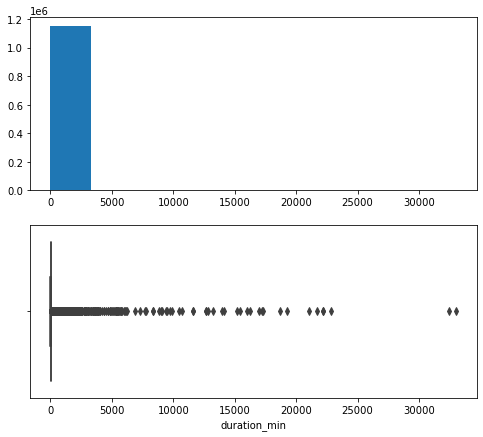

In [24]:
#Plotting a histogram and box plot for duration
plt.figure(figsize=[8, 7])
plt.subplot(2,1,1)
plt.hist(df['duration_min'])

plt.subplot(2,1,2)
sb.boxplot(df['duration_min']);

0.007178584627123376 4.518999946054157


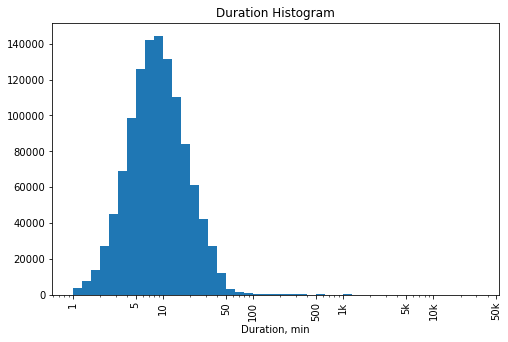

In [25]:
#Platting duration distribution after changing x-axis scale to logarithmic scale
plt.figure(figsize=[8, 5])
plt.xscale('log')
min_min = np.log10(df['duration_min'].min())
max_min = np.log10(df['duration_min'].max())
print(min_min, max_min)
bins = 10 ** np.arange(0.001, max_min+0.01,0.1)
labels = [1,5,10,50,100,500,1000,5000,10000,50000]
labels_str = ['1','5','10','50','100','500','1k','5k','10k','50k']
plt.hist(df['duration_min'], bins=bins)
plt.xticks(labels, labels_str, rotation=90);
plt.title('Duration Histogram')
plt.xlabel('Duration, min');

As observed from the above plots, after plotting a histogram for duration, the data was highly skewed to the right, so we check for outliers using box plot where a lot of outliers were found above 16 minutes causing this high skew to the right, another histogram was plotted after changing x-axis scale to logarithmic scale, and the data was found to be normally distributed around 9 minutes. Based on the distribution, the trips can be categorized into short trips (below 20 minutes), moderate trips (more than 20 minutes and less than 1 hour) and finally long trips (more than 1 hour). 

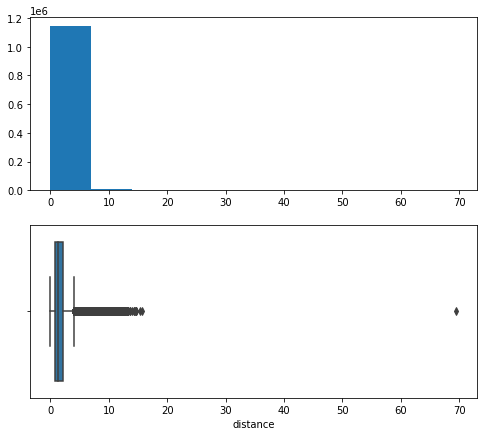

In [26]:
#Plotting a histogram and box plot for distance
plt.figure(figsize=[8, 7])
plt.subplot(2,1,1)
plt.hist(df['distance'])

plt.subplot(2,1,2)
sb.boxplot(df['distance']);

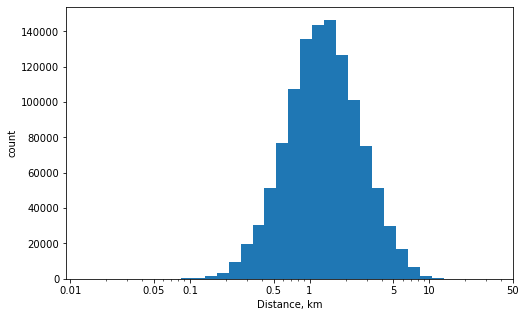

In [27]:
#Platting distance distribution after removing zero values/69 km outlier and changing x-axis scale to logarithmic scale
df_dis = df.query('distance != 0 & distance < 20')
min_dis = np.log10(df_dis['distance'].min())
max_dis = np.log10(df_dis['distance'].max())

plt.figure(figsize=[8, 5])
plt.xscale('log')
bins = 10 ** np.arange(min_dis, max_dis + 0.1, 0.1)
plt.hist(df_dis['distance'], bins=bins);
labels = [0.01,0.05,0.1,0.5,1,5,10,50]
plt.xticks(labels,labels)
plt.xlabel('Distance, km')
plt.ylabel('count');

The previous plot shows a nearly normal distribution around 2 km after changing x axis scale to logarithmic scale, but the distribution is very close to duration distribution, also there are some points where the start and end stations are the same, so the distance is zero and this will have an impact on distance distribution, consequently, it will be a good practice to focus only on one dependent variable which will be duration, as it will has the more direct impact on revenues.

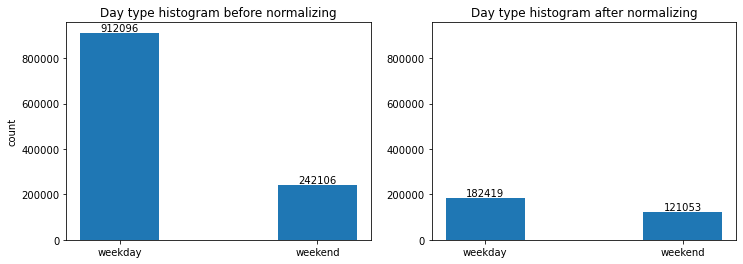

In [28]:
#Plotting day of week counts
x = df['day_type'].unique()
y = df['day_type'].value_counts(sort=False)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.bar(x, y, width = 0.4)
limits = plt.ylim()
plt.ylabel('count')
plt.title('Day type histogram before normalizing')
for i in range (y.shape[0]):
    count = y[i] 
    plt.text(i, count+8000, count, ha='center')

plt.subplot(1,2,2)
y[0] = y.weekday / 5
y[1] = y.weekend / 2
plt.bar(x, y, width = 0.4)
plt.ylim(limits)
plt.title('Day type histogram after normalizing')
for i in range (y.shape[0]):
    count = y[i] 
    plt.text(i, count+8000, count, ha='center');

As observed from the above figure, bike sharing counts is much higher in weekdays than weekends, even after normalizing to determine the average bike sharing per day for each category, bike sharing in weekdays is nearly 1.5 times bike sharing in weekends. 

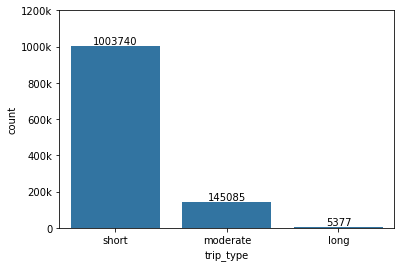

In [29]:
#plotting trip type counts
base_color = sb.color_palette()[0]
trip_counts = df['trip_type'].value_counts(ascending=False)
trip_order = trip_counts.index
sb.countplot(data=df , x='trip_type', color=base_color, order=trip_order)
labels = ['0','200k','400k', '600k', '800k', '1000k', '1200k']
labels_loc = [0,200000,400000,600000,800000,1000000,1200000]
plt.yticks(labels_loc,labels);

for i in range (trip_counts.shape[0]):
    count = trip_counts[i] 
    plt.text(i, count+10000, count, ha='center')

The above plot shows that short trips (below 20 minutes) is the most common trips in GoBike system wit more than 1M trips out of 1,154,202 total trips, then comes moderate and long trips.  

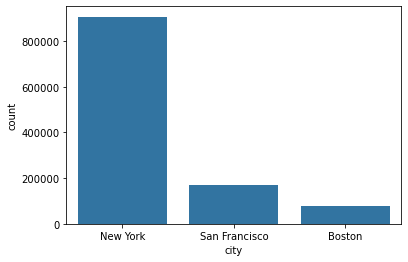

In [30]:
#plotting bike share ride counts for each city
city_order = df['city'].value_counts(ascending=False).index
sb.countplot(data=df , x='city', color=base_color, order=city_order);

The above figure showed that New York city comes first with more than 800,000 rides, then comes San Francisco and Boston.

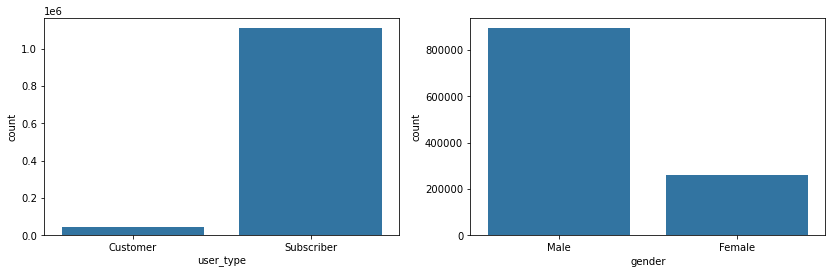

In [31]:
#plotting user type and gender counts
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sb.countplot(data=df , x='user_type', color=base_color)
plt.subplot(1,2,2)
sb.countplot(data=df , x='gender', color=base_color);

As observed from the previous plot, the majority of users in bike sharing system are subscribers and also males (nearly three times females).

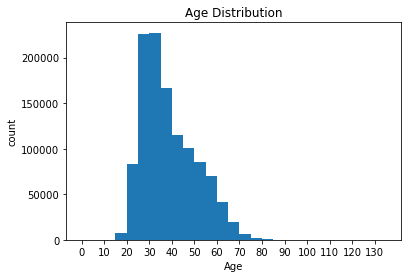

In [32]:
#Plotting age distribution
plt.hist(df['age'], bins=np.arange(0,140,5))
plt.xticks(np.arange(0,140,10))
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution');

As observed from the previous histogram, the main segment of bike sharing users are between 25-35 years and comes next 35-40, 40-45 and 20-25 segments, also there is a gradual decrease in counts after 45 years.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable took on a large range of values, so x-axis scale was changed into logarithmic scale, and the data was found to be normally distributed around 9 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration distribution range was high, so the trips were categorized into three main categories based on duration, short trips (below 20 minutes), moderate trips (more than 20 minutes and less than 1 hour) and finally long trips (more than 1 hour).

## Bivariate Exploration


In [33]:
#Determining numeric and categorical variables
numeric_vars = ['duration_min', 'age', 'distance', 'hour']
categoric_vars = ['trip_type', 'user_type', 'gender', 'city', 'day_type']

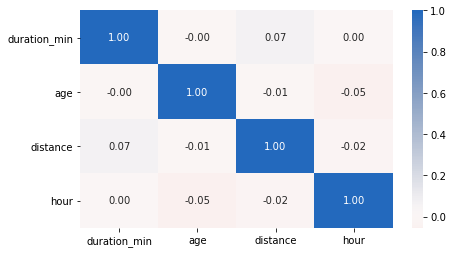

In [34]:
# correlation plot
plt.figure(figsize = [7, 4])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

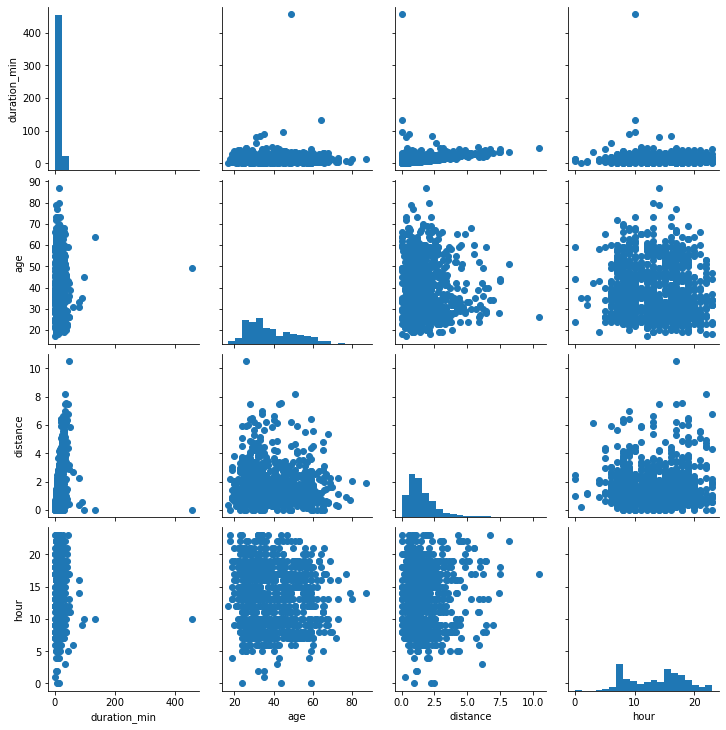

In [35]:
#Plotting pair grid for numerical variables
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.iloc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

As shown from the above correlation and pair plots, there is no direct relation between numerical variables, even with taking a sample of 1000 trips, the scatter plots cannot clearly shows relation between variables. 

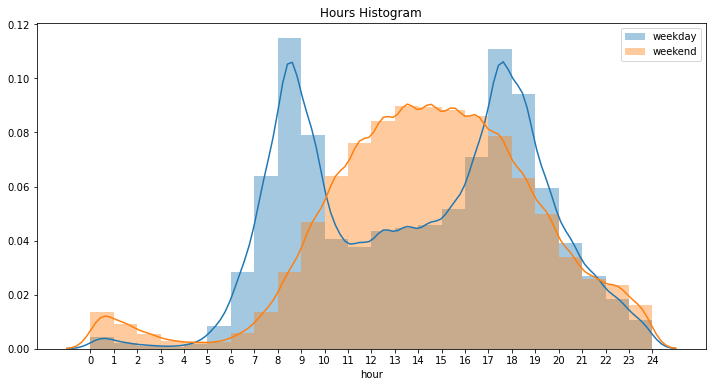

In [36]:
#plotting histogram for day hours for both weekdays and weekends
df_wd = df.query('day_type == "weekday"')
df_we = df.query('day_type == "weekend"')
bins = np.arange(0,25,1)

plt.figure(figsize=[12, 6])
sb.distplot(df_wd['hour']+0.5, bins=bins, kde_kws = {'bw' : 0.5})
sb.distplot(df_we['hour']+0.5, bins=bins, kde_kws = {'bw' : 0.5})
plt.xticks(bins)
plt.title('Hours Histogram')
plt.legend(('weekday', 'weekend'), loc=0);

The above histograms for day hours in both weekdays and weekends clearly shows the difference between bike sharing hours depending on which type of days we are dealing with.

Firstly for the weekdays, there is a bimodal curve observed with the first peak around 8-9 am and the second peak around 5-6 pm which matches work arrival and departure times, the curve also showed a very low bike sharing counts between 12 am and 6 am and a gradual decrease after 8 pm, there is also a nearly steady sharing counts between 10 am and 4 pm.

Second for the weekends, there is a complete different curve with only one peak around 2 pm with a gradual decrease before and after this time, the curve again showed a very low bike sharing counts between 12 am and 6 am.

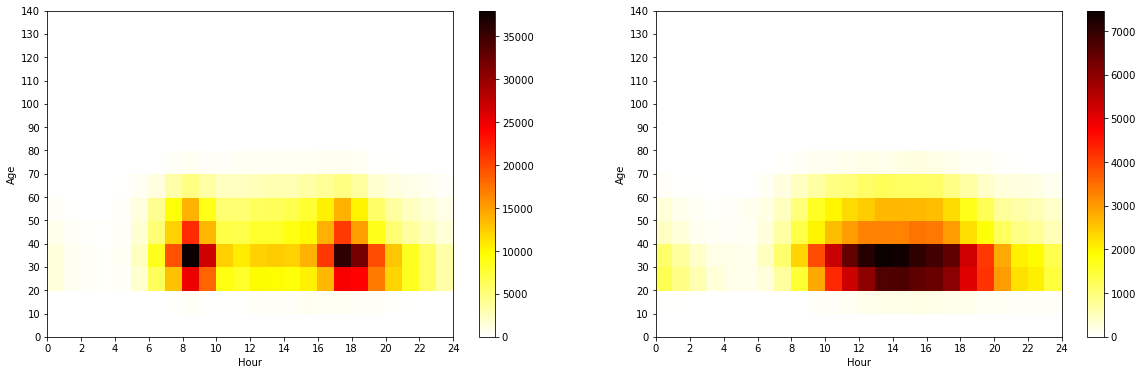

In [37]:
#Plotting a heat map for hour vs age 
plt.figure(figsize=(20,6))
bins_x = np.arange(0, 25, 1)
bins_y = np.arange(0, 150, 10)

j=1
for var2 in df['day_type'].unique():
    plt.subplot(1,2,j)
    df_ty = df[df['day_type']==var2]
    plt.hist2d(data = df_ty, x = 'hour', y = 'age', cmap='hot_r', bins = [bins_x, bins_y])
    plt.colorbar()
    j=j+1
    plt.xticks(np.arange(0,25,2))
    plt.yticks(bins_y)
    plt.xlabel('Hour')
    plt.ylabel('Age');

The above heat map is very important in determining both the age of the target segment and the hours where the trips become at the peak, as discussed in both age and hours distribution curves, the main target segment in weekdays are 20-45 age employees as the map shows the peak of trips at work arrival and departure hours, while during the weekends the same 20-45 age people with the peak between 11 am to 6 pm.  

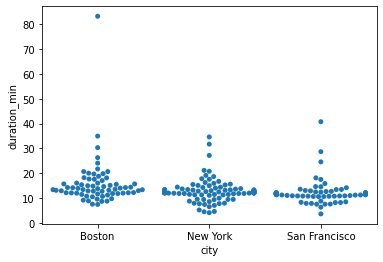

In [38]:
#Plaotting a swarm plot for the average trip duration in each city
df_dur = df.groupby(['city', 'age'])['duration_min'].mean().reset_index()
sb.swarmplot(data=df_dur, x='city', y='duration_min', color=base_color);

The above swarm plot shows that there is no signficant difference in the avergae trip duration in the three cities.

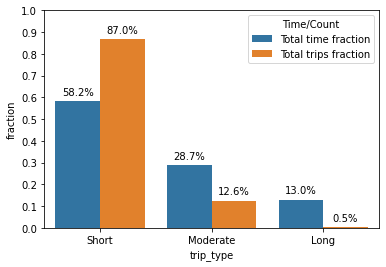

In [39]:
#Plotting a bar chart for the total trip counts and total time duration fraction for each of the three trip categories
y1 = df.query('trip_type == "short"').duration_min.sum()/df.duration_min.sum()
y2 = df.query('trip_type == "short"').shape[0]/df.shape[0]
y3 = df.query('trip_type == "moderate"').duration_min.sum()/df.duration_min.sum()
y4 = df.query('trip_type == "moderate"').shape[0]/df.shape[0]
y5 = df.query('trip_type == "long"').duration_min.sum()/df.duration_min.sum()
y6 = df.query('trip_type == "long"').shape[0]/df.shape[0]

data = {'fraction':[y1, y2, y3, y4, y5 , y6],
       'trip_type': ["Short", "Short", "Moderate", "Moderate", "Long", "Long"],
       'Time/Count':["Total time fraction", "Total trips fraction", "Total time fraction", "Total trips fraction","Total time fraction", "Total trips fraction"]}

df_duration = pd.DataFrame.from_dict(data)
splot = sb.barplot(data = df_duration, x='trip_type', y='fraction', hue='Time/Count')
plt.yticks(np.arange(0,1.1,0.1));

for p in splot.patches: 
    splot.annotate("{0:.1%}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points') 

The above bar chart shows the total trip counts and time percentage for all three trip categories.
-The short trips represents 87% of all trips and also represents 58.2% of all trips duration.
-The moderate trips represents 12.6% of all trips and also represents 28.7% of all trips duration.
-The long trips represents 0.5% of all trips and also represents 13% of all trips duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For day hours, the distribution of trips was completely different when plotting data for weekdays and for weekends, where the hours distribution was bimodal for weekdays around 8-9 am and 5-6 pm, while for weekends distribution, there was only one peak around 2 pm. For day of the week counts, the average bike sharing per day for each category was calculated by normalizing weekdays and weekends where weekdays were divided by five and weekends were divided by two in order to have a more representative count rate per day category.

> The interesting thing about trip categories is that although short trips represents the majority of trips with more than 87%, the sum of trips duration represents only 58.2% of all trips duration, on the other side, moderate and long trips which represents nearly 13% of all trips, their summation of trip duration is more than 40%, this imporatant observation should be accounted for when planning marketing strategies for each trip category as moderate and long trips will have higher duration despite low counts and hence high revenues.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The heat map clearly determines both the age of the target segment and the hours where the trips become at the peak, the main target segment in weekdays are 20-45 age employees as the map shows the peak of trips at work arrival and departure hours, while during the weekends the same 20-45 age people with the peak between 11 am to 6 pm.  

## Multivariate Exploration


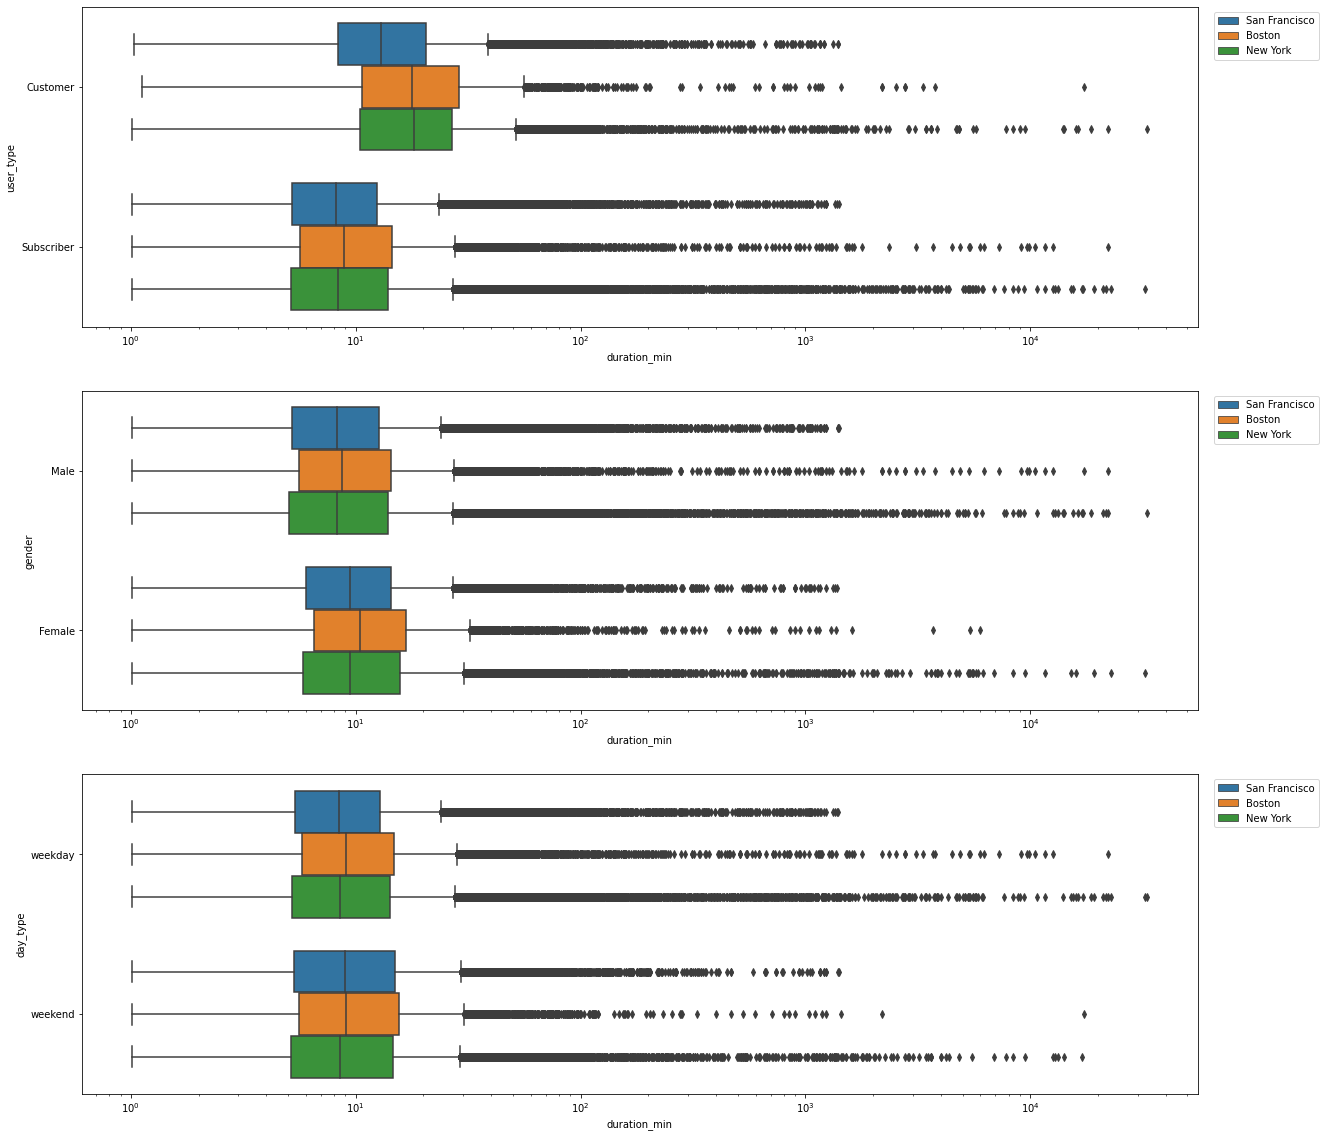

In [40]:
#Plotting all categorical variables vs duration variable
plt.figure(figsize=(20,20))

vars = ['user_type', 'gender', 'day_type']

for var in vars:
    i = vars.index(var) + 1
    plt.subplot(3,1,i)
    plt.xscale('log')
    sb.boxplot(data=df, x='duration_min', y=var, hue='city')
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');

<br> The above box plots shows the relation between duration variable (log scale) vs three categorical variables for the three cities.
<br> -For user type variable, there is a clear difference in duration distribution between customers and subscribers where customers interquartile range of duration is higher than those of subscribers.
<br> -For both gender and day type variables, there is no clear differences in duration distribution for all three cities.

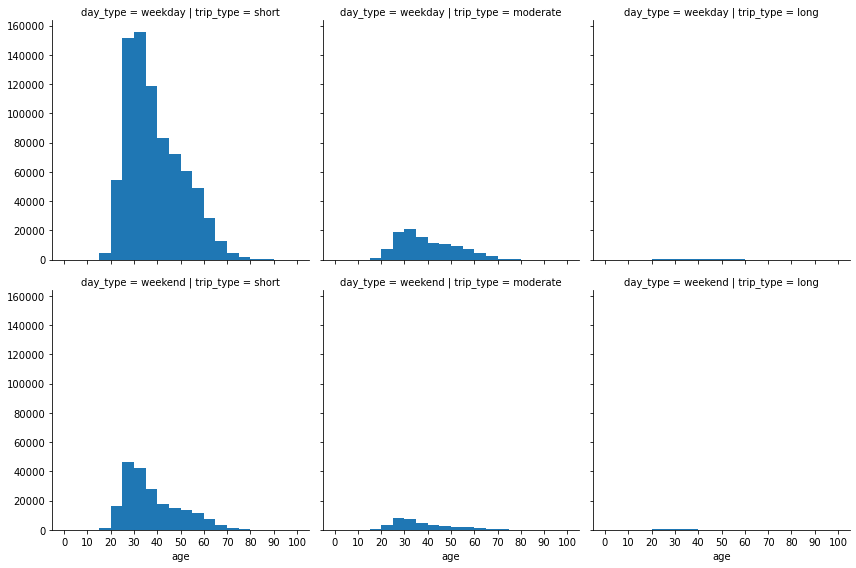

In [41]:
#Plotting a facetgrid to determine the age distribution for each day type and trip type
trip_order = ['short', 'moderate', 'long']
g = sb.FacetGrid(data = df, col = 'trip_type', row='day_type',col_order=trip_order, sharey=True, height=4, aspect=1)
g.map(plt.hist, "age", bins=np.arange(0,105,5))
plt.xticks(np.arange(0,110,10));

The above facet-grid plot represents the age distribution for each day type and trip type, for both weekdays and weekends, we can clearly observe that the age distribution and hence the target segment age gets narrower as we moved from short to moderate and long trips. This is an important point as old age people are only interseted in short type trips. 

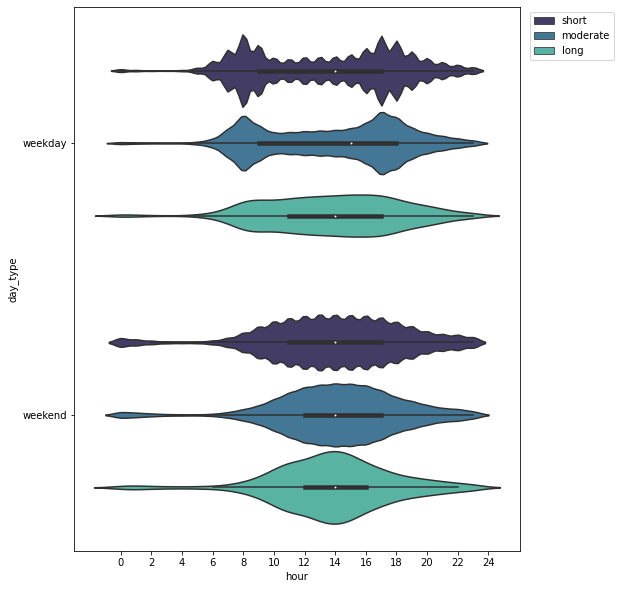

In [42]:
#Plotting trips distribution along day hours for the three trip categories in weekdays/weekends
plt.figure(figsize=(8,10))
trip_order = ['short', 'moderate', 'long']
sb.violinplot(data=df, x='hour', y='day_type', hue='trip_type', hue_order=trip_order, palette = 'mako')
plt.xticks(np.arange(0,25,2))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');

The above plots represents the trips distribution along day hours for the three trip categories in weekdays/weekends, the interesting note is that in weekdays, both short and moderate trips follows the same bi-modal distribution as that discussed earlier in hours distribution, while long trips have only one peak. For the weekends, the distribution is nearly the same for all three categories, this plot shows that long trips are not related to day type whether weekends or weekdays and also are not related to work arrival and departure times, so finally we can conclude that long trips require a different marketing strategy as it targets a different segment than short and moderate trips. 

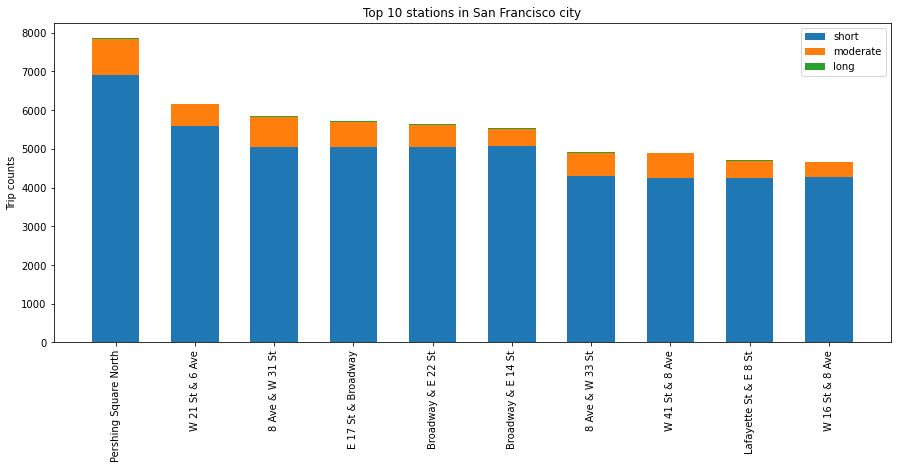

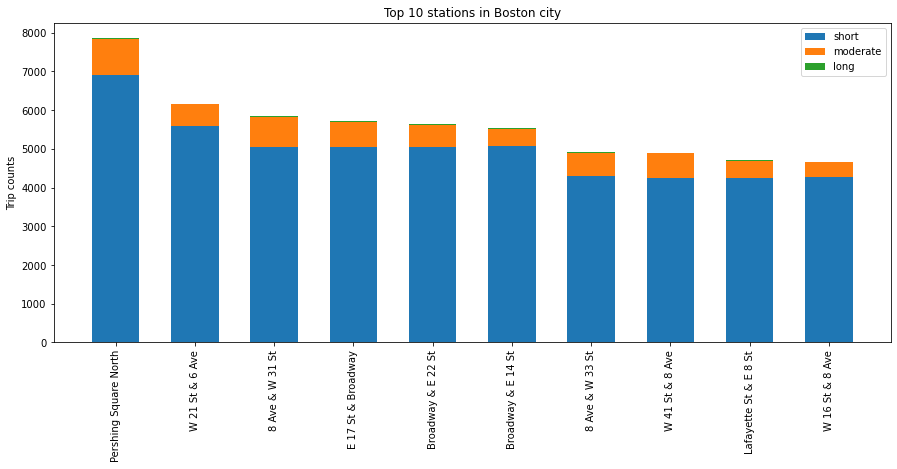

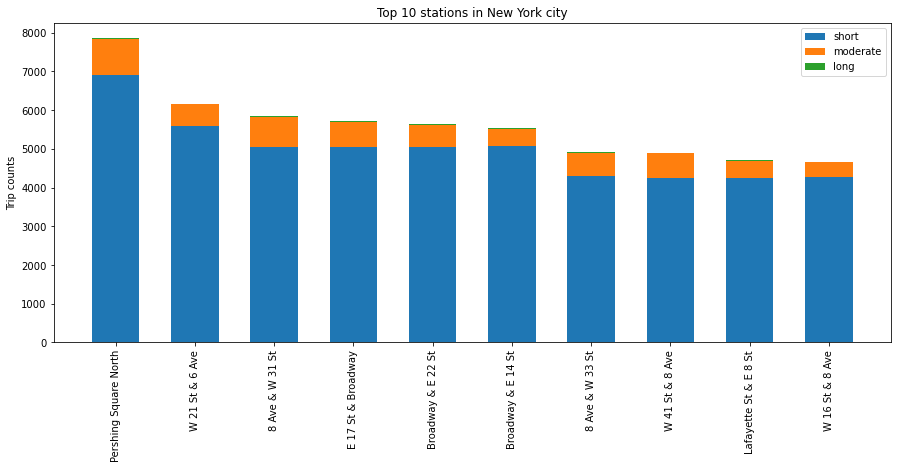

In [43]:
#Plotting the top 10 stations in each city 
cities = list(df['city'].unique())
for city in cities:
    df_city = df.query('city == city')
    labels = df_city['start_station_name'].value_counts().nlargest(10).index
    df_city_short = df_city[df_city.start_station_name.isin(labels)].loc[df_city['trip_type']=="short"]
    short = df_city_short['start_station_name'].value_counts().reindex(index = labels)
    df_city_moderate = df_city[df_city.start_station_name.isin(labels)].loc[df_city['trip_type']=="moderate"]
    moderate = df_city_moderate['start_station_name'].value_counts().reindex(index = labels)
    df_city_long = df_city[df_city.start_station_name.isin(labels)].loc[df_city['trip_type']=="long"]
    long = df_city_long['start_station_name'].value_counts().reindex(index = labels)
    width = 0.6
    i = cities.index(city) + 1
    plt.figure(figsize=(15, 20))
    plt.subplot(3,1,i)
    plt.bar(labels, short, width, label='short')
    plt.bar(labels, moderate, width, bottom=short, label='moderate')
    plt.bar(labels, long, width, bottom=short+moderate, label='long')
    plt.ylabel('Trip counts')
    plt.title('Top 10 stations in ' + city + ' city')
    plt.legend()
    plt.xticks(rotation=90);

The above stacked bar plot shows the top 10 stations in each city according to the total no. of trips, it also sub-divideds the trips into the three main categories to show how many trips are done in each category, these stations are the main stations which should be accounted for while planning.

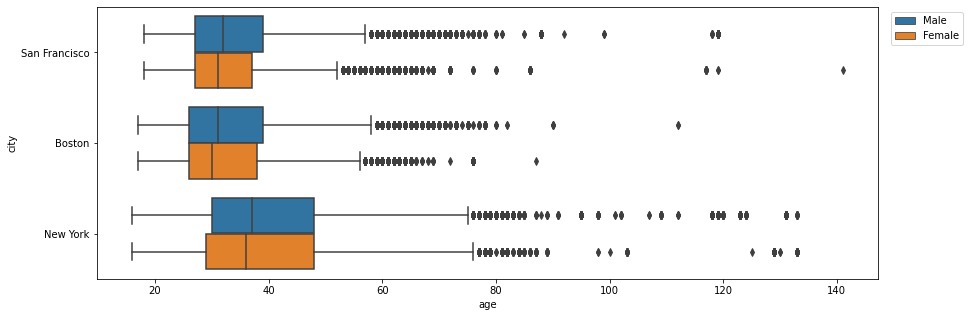

In [44]:
#Platting users age distribution for each city and gender
plt.figure(figsize=(14,5))
sb.boxplot(data=df, x='age', y='city', hue='gender')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');

The above box plot shows the users age distrbution in each city and also for each gender, the box plot shows that In San-Francisco and Boston, the age distribution is nearly the same with males distrbution covering a slighly higher range than females, while for New-York city, both males and females distribution is higher than the other two cities with an upper whisker at nearly 87 years old and interquartile range between nearly 30-45 years old. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The plot of trips distribution along day hours of each of trip categories is matched with all trips distribution along day hours in weekdays for both short and moderate trips (bi-modal distribution), but for long trips the curve has one peak in both weekdays and weekends, so we can conclude that long trips require a different marketing strategy as it targets a different segment than short and moderate trips. 

### Were there any interesting or surprising interactions between features?

> For user type variable, there is a clear difference in duration distribution between customers and subscribers, where customer-type user trips are higher in duration than trips of subscriber-type user.